In [1]:
import tensorflow as tf  #tf >2.0
import pandas as pd
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
info = pd.read_csv('/content/drive/MyDrive/Monkey Classification/monkey_labels.txt',delimiter=',')
info.columns = ['Label','Latin_Name','Common_Name','Train_Images','Validation_Images']
info.head()

,Label,Latin_Name,Common_Name,Train_Images,Validation_Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26


### Class Distribution :

In [3]:
fig = px.pie(
    names=info['Common_Name'],
    values=info['Train_Images'],
    width=800,
    hole=0.4
)
fig.update_layout({'title':{'text':'Train Class Distribution','x':0.45}})
fig.show()

All the classes are almost equally distributed, this is a good news as the model will not be biased towards any class and learning will be pure.

In [4]:
fig = px.pie(
    names=info['Common_Name'],
    values=info['Validation_Images'],
    width=800,
    hole=0.4
)
fig.update_layout({'title':{'text':'Validation Class Distribution','x':0.45}})
fig.show()

The Class distribution along the data is equal.

In [5]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [6]:
# Training Set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Monkey Classification/Data/training/training',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 1098 images belonging to 10 classes.


In [7]:
# Test Set
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/Monkey Classification/Data/validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


## Lets make CNN

In [8]:
#Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

## Lets Train

In [10]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
69/69 [==============================] - 422s 6s/step - loss: 2.5288 - accuracy: 0.1102 - val_loss: 2.2181 - val_accuracy: 0.1324
Epoch 2/20
69/69 [==============================] - 120s 2s/step - loss: 2.0674 - accuracy: 0.2341 - val_loss: 1.8896 - val_accuracy: 0.3346
Epoch 3/20
69/69 [==============================] - 118s 2s/step - loss: 1.7342 - accuracy: 0.3634 - val_loss: 1.6998 - val_accuracy: 0.4338
Epoch 4/20
69/69 [==============================] - 120s 2s/step - loss: 1.5040 - accuracy: 0.4417 - val_loss: 1.5785 - val_accuracy: 0.4375
Epoch 5/20
69/69 [==============================] - 118s 2s/step - loss: 1.4997 - accuracy: 0.4581 - val_loss: 1.6960 - val_accuracy: 0.3897
Epoch 6/20
69/69 [==============================] - 118s 2s/step - loss: 1.3993 - accuracy: 0.5055 - val_loss: 1.5159 - val_accuracy: 0.4449
Epoch 7/20
69/69 [==============================] - 122s 2s/step - loss: 1.3344 - accuracy: 0.5301 - val_loss: 1.4139 - val_accuracy: 0.5110
Epoch 8/20
69

In [11]:
history.model.save('Monkey-Classifictaion_model.h5')

In [14]:
model=tf.keras.models.load_model('/content/Monkey-Classifictaion_model.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

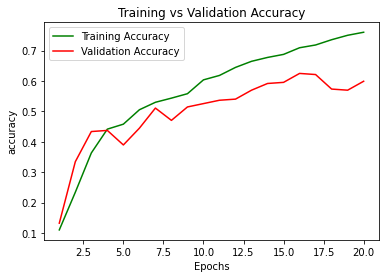

In [18]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

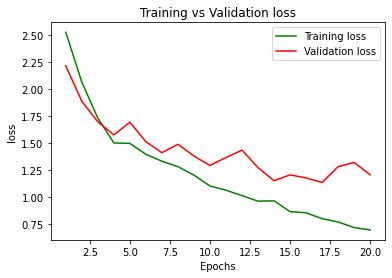

In [19]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Testing

In [20]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

In [23]:
txt=pd.read_csv('/content/drive/MyDrive/Monkey Classification/monkey_labels.txt')

1/1 [==============================] - 0s 44ms/step


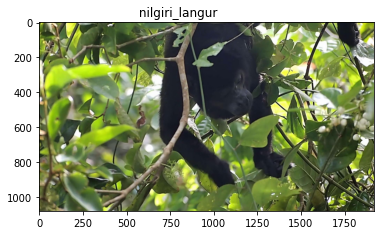

In [25]:
test_image=r'/content/drive/MyDrive/Monkey Classification/Data/training/training/n0/n0019.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()